<h1><b><i> AIRBNB DATA ANALYSIS<h1>

<p><i>author: Lutfia Husna Khoirunnisa<i><p>
<P><i>(https://www.linkedin.com/in/lutfiahusnakhoirunnisa)<p>
<img src="https://www.johnlkong.com/wp-content/uploads/2018/01/hilton_hotel_header-720x245.jpg" width="900" height="200" align="left" margin="300">


<h4><b><i> Introduction to the project:<h4>
<p>

Pada satu tahun terakhir ini, kasus covid-19 di dunia sudah cukup menurun. Banyak aktivitas yang sebelumnya tidak dapat dilakukan karena adanya pandemi covid-19 kini telah mulai berjalan kembali, salah satu aktivitas yang kini sudah mulai banyak dilakukan adalah traveling. Dengan mulai bergeraknya kembali industri pariwisata, para pebisnis mulai kembali melirik sektor tersebut untuk mengambil peluang sebesar-besarnya. Salah satu bisnis yang sedang naik saat ini adalah bisnis Airbnb. 

Airbnb merupakan suatu online market platform yang dapat digunakan untuk memasarkan maupun mencari penginapan. Dengan adanya Airbnb ini tentu sangat memudahkan wisatawan untuk mencari penginapan saat melakukan traveling, dan juga memudahkan pemilik penginapan untuk memasarkan penginapannya.

Saat seorang pebisnis akan membangun suatu usaha penginapan di Airbnb, perlu untuk melakukan riset bagaimana pasar dan kompetitor agar dapat  menentukan strategi yang tepat untuk diterapkan agar memperoleh keuntungan maksimal. Tentunya strategi  yang tepat akan berpengaruh pada tingginya kegiatan penyewaan.

Pada project ini akan dilakukan analisa data yang diperoleh di Airbnb di Singapura untuk menggali insight yang kemudian dapat digunakan untuk mendapatkan suatu business recommendation untuk pebisnis yang ingin mengembangkan usaha penginapan di Singapura.

</p>

***Project goals:***

Dilakukan analisis untuk memberikan gambaran kepada calon pebisnis mengenai penginapan yang ada di Singapura, agar dapat menetapkan strategi yang tepat untuk memberikan keuntungungan maksimal.

***Action:***

Melakukan data cleaning dan melakukan analisa data dengan mewujudkannya menjadi suatu visualisasi yang dapat mempermudah user menangkap insight dari data.

##***Import the Dataset***

Pada project ini akan digunakan 3 dataset yaitu Airbnb Listing, Listings Reviews History, dan Neighborhood Mapping

In [99]:
#connecting colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Data importing
import pandas as pd
listing = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Airbnb Analysis/DQLab_listings(22Sep2022) (1).csv', sep = ',')
nbhood = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Airbnb Analysis/DQLab_nieghbourhood(22Sep2022).csv', sep = ',')
rvw = pd.read_csv('/content/drive/MyDrive/PORTFOLIO/Airbnb Analysis/DQLab_reviews(22Sep2022).csv', sep = ',')

##***Data Overview & Cleansing***

###***Airbnb Listing Dataset***

In [101]:
#listing info
print(listing.info())
print('\n Banyak missing data pada dataset :', listing.isna().sum().sum())
print('\n Banyak duplicated data pada dataset :', listing.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4161 non-null   int64  
 1   id                4161 non-null   int64  
 2   name              4161 non-null   object 
 3   host_id           4161 non-null   int64  
 4   host_name         4161 non-null   object 
 5   neighbourhood     4161 non-null   object 
 6   latitude          4161 non-null   float64
 7   longitude         4161 non-null   float64
 8   room_type         4161 non-null   object 
 9   price             4161 non-null   int64  
 10  minimum_nights    4161 non-null   int64  
 11  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 390.2+ KB
None

 Banyak missing data pada dataset : 0

 Banyak duplicated data pada dataset : 0


Dataset Airbnb Listing memiliki 12 kolom, dan 4161 baris data. Dataset ini tidak memiliki missing value maupun duplicated data. 

Berikut merupakan uraian dari masing-masing kolom:
*   id : Listing’s unique Airbnb id
*   name : Listing's name/display in the Airbnb Web
*   host_id : Listing's host unique id
*   host_name : Listing's host_name
*   neighbourhood : Listings’s neighborhood name
*   latitude : Listing’s earth latitude location
*   longitude : Listing’s earth longitude location
*   room_type : Listing’s room type
*   price :  Listing’s price
*   minimum_nights : Indicator of minimum stay length
*   avaiability_365 : indicator of the total number of days the listing is
available for during the year



Berikut merupakan deskripsi statistik dari dataset  Airbnb Listing:

In [102]:
listing.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,availability_365
count,4161.000000,4.161000e+03,4.161000e+03,4161.000000,4161.000000,4161.000000,4161.000000,4161.000000
mean,2080.000000,1.354784e+17,1.559857e+08,1.344527,103.815150,214.505167,57.566931,247.704158
std,1201.321564,2.653249e+17,1.356249e+08,0.066965,0.065450,454.921421,65.746522,132.564024
min,0.000000,5.064600e+04,2.366600e+04,1.248260,103.635300,0.000000,1.000000,0.000000
25%,1040.000000,2.507292e+07,4.187059e+07,1.296100,103.769550,60.000000,1.000000,126.000000
50%,2080.000000,3.990020e+07,1.367001e+08,1.313930,103.840400,120.000000,92.000000,322.000000
75%,3120.000000,5.319607e+07,2.388916e+08,1.414620,103.855030,235.000000,92.000000,361.000000
max,4160.000000,7.208120e+17,4.804050e+08,1.488000,103.977662,12494.000000,1000.000000,365.000000


Berikut merupakan sample dari dataset  Airbnb Listing:

In [103]:
display(listing.head())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


***Listing Dataset Distribution***

In [104]:
import plotly.express as px
fig_dist1 = px.box(data_frame=listing, x = 'availability_365', width = 500, height=200)
display(fig_dist1)
fig_dist2 = px.box(data_frame=listing, x = 'minimum_nights', width = 500, height=200)
display(fig_dist2)
fig_dist3 = px.box(data_frame=listing, x = 'price', width = 500, height=200)
display(fig_dist3)

Dari boxplot, terlihat pada kolom minimum_night terdapat data yang tidak normal, dimana terdapat kamar yang minimal lama sewa lebih dari 365 malam atau lebih dari 1 tahun. Data tersebut akan dihapus karena mungkin terjadi kesalahan dalam pendataan minimum lama sewa, atau kamar tersebut bukan merupakan kamar penginapan tetapi apartemen yang disewakan untuk tempat tinggal.

Dan dari boxplot harga, terlihat bahwa terdapat kamar yang memiliki harga sewa 0. Data tersebut perlu kita hapus dari dataset karena terdapat kemungkinan kesalahan pendataan, atau kamar tersebut memang bukan disewakan secara komersil.

In [105]:
listing = listing[listing['minimum_nights']<=365].reset_index()
fig_dist2 = px.box(data_frame=listing, x = 'minimum_nights', width = 500, height=200)
display(fig_dist2)

In [106]:
listing = listing[listing['price']>0].reset_index()
fig_dist3 = px.box(data_frame=listing, x = 'price', width = 500, height=200)
display(fig_dist3)

Selanjutnya akan dilihat bagaimana penyebaran kamar Airbnb di Singapura beradarkan tempatnya.

In [107]:
fig_map = px.scatter_mapbox(listing, lat="latitude", lon="longitude", hover_name='id',zoom=9, height=300, width=400)
fig_map.update_layout(mapbox_style="open-street-map")
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()

Dari plot peta tersebut, diketahui banyak kamar Airbnb yang di luar Singapura tetapi masuk ke dalam daftar, sehingga data kamar di luar Singapura tersebut perlu untuk dihapus. 

Untuk menghapus data kamar di luar Singapura, dilakukan pembersihan secara manual dengan melihat latitude dan longitude kamar.

In [108]:
listing = listing[listing['latitude']<1.45328] #hapus tempat yang memiliki latitude lebih dari 1.45328(di sebelah utara Singapura)
#hapus tempat yang berada lebih dari barat laut Singapura
outer_place_index = listing[ (listing['latitude'] > 1.405) & (listing['longitude'] < 103.664) ].index 
listing.drop(outer_place_index , inplace=True)
#hapus tempat yang masih berada di luar Singapura 
outer_id_index = listing[listing['id'].isin([708999801528964619,39732595,39757287,28268681,29171020,27248990,27532454,540170321699689740])].index
listing.drop(outer_id_index , inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
#Map plot after cleaning
fig_map2 = px.scatter_mapbox(listing, lat="latitude", lon="longitude", hover_name='name',zoom=9, height=300, width=500)
fig_map2.update_layout(mapbox_style="open-street-map")
fig_map2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map2.show()

Setelah dilakukan pembersihan data, terlihat bahwa dataset listing yang baru kini telah bebas dari data kamar Airbnb di luar Singapura.

In [110]:
print(f'Kini dataset Listing memiliki {listing.shape[1]} kolom data, dan {listing.shape[0]} baris data ')

Kini dataset Listing memiliki 14 kolom data, dan 3127 baris data 


Kini dataset Listing memiliki 12 kolom data, dan 3127 baris data 

###***Listings Reviews History***

In [111]:
#Neighborhood Dataset info
rvw.info()
print('\n Banyak missing data pada dataset :', rvw.isna().sum().sum())
print('\n Banyak duplicated data pada dataset :', rvw.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49695 non-null  int64 
 1   listing_id  49695 non-null  int64 
 2   date        49695 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.1+ MB

 Banyak missing data pada dataset : 0

 Banyak duplicated data pada dataset : 0


Dataset Listings Reviews History memiliki 3 kolom, dan 49695 baris data. Dataset ini tidak memiliki missing value maupun duplicated data. 

Berikut merupakan uraian dari masing-masing kolom:
*   listing_id : Listing’s unique Airbnb id
*   date : Date when specific listing
was rented

Berikut merupakan data sample dari dataset Listings Reviews History:

In [112]:
display(rvw.head())

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


Karena terdapat beberapa kamar Airbnb di Singapura yang dihapus dari daftar karena tidak memenuhi ketentuan, maka dataset review juga perlu untuk dibersihkan dari data kamar yang dihapus dari dataset Listing.

In [113]:
rvw = rvw[rvw['listing_id'].isin(listing['id']) == True]
print(f'Kini dataset Listing memiliki {rvw.shape[1]} kolom data, dan {rvw.shape[0]} baris data ')

Kini dataset Listing memiliki 3 kolom data, dan 22482 baris data 


In [114]:
display(rvw.head())

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


Dari data sample tersebut, terlihat bahwa dataset belum terurut berdasarkan tanggal. Untuk mempermudah dalam melakukan analisis Data, maka akan diurutkan berdasarkan tanggal.

In [115]:
rvw = rvw.sort_values('date')
display(rvw.head())
display(rvw.tail())

,Unnamed: 0,listing_id,date
11562,20103,21937326,2018-01-01
255,895,756267,2018-01-01
3284,7097,8180346,2018-01-01
9492,17727,18674998,2018-01-01
6370,13288,13254555,2018-01-01


,Unnamed: 0,listing_id,date
42381,50936,47945468,2022-09-22
1221,2825,4008423,2022-09-22
49539,58094,685737890066148570,2022-09-22
37566,46121,42079889,2022-09-22
49477,58032,682352208578700102,2022-09-22


###***Neighborhood Mapping Dataset***

In [116]:
#Neighborhood Dataset info
nbhood.info()
print('\n Banyak missing data pada dataset :', nbhood.isna().sum().sum())
print('\n Banyak duplicated data pada dataset :', nbhood.duplicated().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           55 non-null     int64 
 1   neighbourhood_group  55 non-null     object
 2   neighbourhood        55 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB

 Banyak missing data pada dataset : 0

 Banyak duplicated data pada dataset : 0


Pada dataset Neighborhood Mapping terdapat 3 kolom dan 55 row data. Berikut merupakan uraian dari masing-masing kolom:


*   Neighbourhood_group : Singapore region (North/East/South/West/North-East)
*   Neighbourhood : Singapore neighborhoods name 

Berikut merupakan sample dari dataset Neighborhood Mapping:

In [117]:
display(nbhood.head())

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


### ***Data Merging***

Sebelum melakukan analisis distribusi lebih lanjut, kita perlu untuk membentuk suatu tabel baru yang memuat data id, neighbourhood_group, neighbourhood, minimum nights, price, dan berapa hari dalam setahun suatu kamar disewa. Hal ini dilakukan dengan melakukan merging atau join tabel Airbnb Listing dan Neighborhood Mapping.

In [118]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import pandasql as ps
listing_nbgroup = ps.sqldf("""
                   select b.id, b.name, a.neighbourhood_group,b.room_type, b.neighbourhood,b.longitude, b.latitude, b.minimum_nights, b.price, (365-b.availability_365) rented_365
                   from nbhood a join listing b on a.neighbourhood=b.neighbourhood 
                """)
display(listing_nbgroup)

,id,name,neighbourhood_group,room_type,neighbourhood,longitude,latitude,minimum_nights,price,rented_365
0,4926170,Room 4B in Terrace House @ Thomson Village,Central Region,Private room,Bishan,103.83274,1.35349,92,47,9
1,11128602,Luxury 3 bedroom condo. 1389sqf,Central Region,Entire home/apt,Bishan,103.83075,1.36628,180,200,0
2,13243736,Charming 2Bed-2Bath- Parking Full Apartment,Central Region,Entire home/apt,Bishan,103.82800,1.35725,92,209,35
3,19438458,Modern zen bungalow in upper thomson,Central Region,Private room,Bishan,103.82808,1.35732,92,330,365
4,20865016,Lush Green Neighborhood Private Room,Central Region,Private room,Bishan,103.83001,1.35751,92,50,2
...,...,...,...,...,...,...,...,...,...,...
3122,20791161,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,West Region,Entire home/apt,Tuas,103.64828,1.31947,92,10286,276
3123,678316332235165738,"50min from Singapore City, brand new 2BR",West Region,Entire home/apt,Tuas,103.63530,1.34528,92,70,3
3124,13756029,Master room 151 Ang Mo Kio Ave 5,West Region,Entire home/apt,Western Water Catchment,103.66370,1.40472,180,40,365
3125,14157765,A Place Outside the Hectic City Life of Singapore,West Region,Private room,Western Water Catchment,103.73865,1.38534,183,20,365


Kemudian dibentuk juga suatu dataset baru yang memuat data tanggal suatu kamar direview, id, name, room_typem neighbourhood, neighbourhood_group, price, dan lama kamar tersewa dalam satu tahunnya.

In [120]:
import pandasql as ps

listing_reviews = ps.sqldf("""
                   select a.date, strftime('%Y-%m', a.date) month, strftime('%Y', a.date) year, b.id,b.name, b.room_type, b.neighbourhood, 
                   c.neighbourhood_group, b.price, b.minimum_nights, (365-b.availability_365) rented_365
                   from rvw a left join listing b on a.listing_id=b.id join nbhood c on b.neighbourhood = c.neighbourhood
                """)
listing_reviews

,date,month,year,id,name,room_type,neighbourhood,neighbourhood_group,price,minimum_nights,rented_365
0,2018-01-01,2018-01,2018,21937326,Master bed room - 5 mins ride to CBD,Private room,Geylang,Central Region,500,180,275
1,2018-01-01,2018-01,2018,756267,East Coast Boutique,Private room,Marine Parade,Central Region,250,92,365
2,2018-01-01,2018-01,2018,8180346,The Zen Room,Private room,Tampines,East Region,45,92,184
3,2018-01-01,2018-01,2018,18674998,Cozy Premium Studio In Orchard Road (300 sqft),Hotel room,River Valley,Central Region,200,6,20
4,2018-01-01,2018-01,2018,13254555,Double Central Living Shopping Mall Condo MRT,Private room,Bukit Merah,Central Region,132,92,365
...,...,...,...,...,...,...,...,...,...,...,...
22477,2022-09-22,2022-09,2022,47945468,Single cabin shared bathroom in Tanjong Pagar MRT,Private room,Outram,Central Region,287,1,2
22478,2022-09-22,2022-09,2022,4008423,"City 1-Pax Private Room, Shared Toilet",Private room,Kallang,Central Region,62,1,17
22479,2022-09-22,2022-09,2022,685737890066148570,Singapore hotel city infinity pool MBS marina ...,Private room,Downtown Core,Central Region,576,1,25
22480,2022-09-22,2022-09,2022,42079889,Twin Cabin with window near Bugis MRT,Private room,Downtown Core,Central Region,444,1,7


##***Exploratory Data Analysis***

###**Listing Distribution**

####***Bagaimana distribusi dari tipe kamar di Singapura?***

In [121]:
room_type_pie = px.pie(listing, values=listing['room_type'].value_counts().values, color=listing['room_type'].value_counts().index, names=listing['room_type'].value_counts().index, color_discrete_sequence=["#97DECE","#7F167F","#FF597B","#ADE792"], hole=0.5)
room_type_pie.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
room_type_pie.update_layout(title="<b>Listing distribution by Room_type</b>", title_font=dict(size=16))
room_type_pie.show()

Jenis kamar di Airbnb yang paling banyak di Singapura adalah Entire home/apt sebesar 47.4% dari total kamar, yang diikuti oleh Private room sebesar 44.6% dari total kamar.

#### ***Neighbourhood mana yang menyediakan kamar paling banyak?***

Akan dicari 10 neighbourhood yang menyediakan kamar di Airbnb terbanyak:

In [122]:
top_nbhood = listing_nbgroup.groupby(['neighbourhood_group', 'neighbourhood']).agg(count=('neighbourhood','count')).sort_values(by=['count'],ascending=False).reset_index().head(10)
display(top_nbhood)

,neighbourhood_group,neighbourhood,count
0,Central Region,Kallang,384
1,Central Region,Downtown Core,321
2,Central Region,Outram,258
3,Central Region,Rochor,213
4,Central Region,Novena,195
5,Central Region,Queenstown,186
6,Central Region,Bukit Merah,165
7,Central Region,Geylang,162
8,Central Region,River Valley,141
9,East Region,Bedok,122


In [123]:
top_nbhood_plot = px.bar(top_nbhood.sort_values('count'), x = 'count', y = 'neighbourhood', color = 'neighbourhood_group', orientation = 'h', width = 750, color_discrete_sequence=['#ffcaaf','#cc97c1'] )
top_nbhood_plot.update_layout(title="<b>Top 10 Neighbourhood with the most rooms</b>", title_font=dict(size=16))
top_nbhood_plot

#### ***Siapa host yang menyediakan kamar terbanyak di Singapura?***

Selanjutnya akan dicari 5 host yang menyediakan kamar terbanyak di Airbnb Singapura

In [124]:
listing.groupby(['host_id', 'host_name']).agg(count=('neighbourhood','count')).sort_values(by=['count'],ascending=False).reset_index().head(5)

,host_id,host_name,count
0,138649185,Fiona,217
1,156409670,Tia,180
2,66406177,Jay,143
3,2413412,Kaurus,97
4,238891646,Neha,88


Daftar host yang menyediakan kamar terbanyak adalah Fiona, Tia, Jay, Kaurus, dan Neha.

Dari tabel baru tersebut, akan dicari distribusi kamar tersedia di Neighbourhood group di Singapura.

#### ***Bagaimana penyebaran kamar pada tiap Neighbourhood Group?***

In [125]:
nbg_pie = px.pie(listing_nbgroup, values=listing_nbgroup['neighbourhood_group'].value_counts().values, color=listing_nbgroup['neighbourhood_group'].value_counts().index, names=listing_nbgroup['neighbourhood_group'].value_counts().index, color_discrete_sequence=["#97DECE","#7F167F","#FF597B","#C58940","#ADE792"], hole=0.5, width = 750)
nbg_pie.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",pull=[0.1,0,0,0,0],rotation = -115)
nbg_pie.update_layout(title="<b>Listing distribution by Neighbourhood Group</b>", title_font=dict(size=16))
nbg_pie.show()

Diketahui neighbourhood_group yang menyediakan kamar terbanyak di Airbnb Singapura adalah Central Region yang menyediakan 2550 kamar di Airbnb, dimana angka tersebut adalah 81.5% dari total keseluruhan kamar yang tersedia di Airbnb Singapura. Berikut adalah sebaran kamar jika dilihat dari map: 

In [126]:
import plotly.express as px

listing_map = px.scatter_mapbox(listing_nbgroup, lat="latitude", lon="longitude", color="neighbourhood_group", hover_name="neighbourhood_group", zoom=9, width=750, color_discrete_sequence=["#2B3A55","#CE7777","#810CA8","#9C254D","#C060A1"])
listing_map.update_layout(mapbox_style="open-street-map")
listing_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
listing_map.show()

###**Price & Rental Distribution**

####***Bagaimana Distribusi harga kamar Airbnb di Singapura?***

In [127]:
price_mean = listing['price'].mean()
price_max = listing['price'].max()
price_min = listing['price'].min()
print(f'Rata rata harga penginapan di Singapura adalah {price_mean:.2f}')
print(f'dengan harga terendah sebesar {price_min:.2f}')
print(f'dan harga tertinggi sebesar {price_max:.2f}')


import plotly.express as px
price_dist = px.box(listing, x='price')
price_dist.show()

Rata rata harga penginapan di Singapura adalah 247.55
dengan harga terendah sebesar 13.00
dan harga tertinggi sebesar 10286.00


Harga persewaan kamar di Airbnb Singapura memiliki rata rata sebesar 247.55, dengan range 13 hingga 10286.00. 



Berikut merupakan map plotting dari harga penyewaan kamar di Singapura.

In [128]:
import plotly.express as px

price_map = px.scatter_mapbox(listing_nbgroup, lat="latitude", lon="longitude", color="price", hover_name="neighbourhood_group", zoom=9, width=750)
price_map.update_layout(mapbox_style="open-street-map")
price_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
price_map.show()

Dari mapping plot harga tersebut, diketahui bahwa mayoritas dari penyewa kamar di Airbnb memberikan harga dibawah 2000. Distribusi harga ini menyebar, dan tidak bergantung pada dimana letak dari kamar tersebut. Sehingga dapat dikatakan bahwa posisi kamar tidak berkorelasi dengan harga yang diberikan oleh penyewa.

####***Bagaimana distribusi harga pada tiap Neighbourhood Group?***

Dengan tabel listing_nbgroup yang baru dibentuk, kita kemudian akan melakukan analisis distribusi dari harga pada tiap neighbourhood group

In [129]:
listing_nbgroup.groupby('neighbourhood_group').agg(price_mean=('price','mean')).sort_values(by=['price_mean'],ascending=False).reset_index()

,neighbourhood_group,price_mean
0,Central Region,253.196155
1,North Region,241.963415
2,West Region,233.147321
3,East Region,216.888889
4,North-East Region,193.386139


Diketahui bahwa neighbourhood group yang memiliki rata-rata harga tertinggi di Singapura adalah Central Region dengan rata-rata harga penyewaan kamarnya adalah 253.19.

Selanjutnya akan divisualisasikan distribusi dari harga pada tiap neighbourhood group:

In [130]:
price_by_nbg_dist = px.box(listing_nbgroup, x='price', y='neighbourhood_group', color='neighbourhood_group' )
price_by_nbg_dist.show()

In [131]:
listing_nbgroup[listing_nbgroup['price']==listing_nbgroup['price'].max()]

,id,name,neighbourhood_group,room_type,neighbourhood,longitude,latitude,minimum_nights,price,rented_365
3122,20791161,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,West Region,Entire home/apt,Tuas,103.64828,1.31947,92,10286,276


Diketahui bahwa harga penyewaan kamar tertinggi berada pada West Region, yaitu pada kamar dengan id 20791161 yang berada pada Tuas, dengan banyak hari tersewa pada satu tahun selama 276 hari.

####***Bagaimana distribusi harga berdasarkan Room Type?***

In [132]:
price_by_roomtype = listing_nbgroup.groupby('room_type').agg(price_mean=('price','mean')).sort_values(by=['price_mean'],ascending=False).reset_index()
price_by_roomtype

,room_type,price_mean
0,Entire home/apt,350.015054
1,Hotel room,170.507576
2,Private room,168.146999
3,Shared room,119.170940


In [133]:
price_by_roomtype_plot = px.histogram(price_by_roomtype, x = 'room_type', y = 'price_mean', color = 'room_type', width = 750)
price_by_roomtype_plot.update_layout(title="<b>Price mean of each Room Type</b>", title_font=dict(size=16), yaxis_title = 'price_mean')
price_by_roomtype_plot

Pada Airbnb di Singapura, jenis kamar yang memiliki rata-rata harga tertinggi adalah Entire Home/Apt, tentu ini sesuai dengan fasilitas yang diberikan pada Tipe kamar ini.

####***Bagaimana trend atau distribusi lama kamar tersewa dalam satu tahun di Singapura?***

In [134]:
rented_mean = listing_nbgroup['rented_365'].mean()
print(f'Rata rata penginapan di Singapura tersewa selama {rented_mean:.2f} hari tiap tahunnya')

import plotly.express as px
rented_365_dist = px.box(listing_nbgroup, x='rented_365')
rented_365_dist.show()

Rata rata penginapan di Singapura tersewa selama 115.42 hari tiap tahunnya


Rata rata penginapan di Singapura tersewa selama 115 hari tiap tahunnya.

Berikut merupakan sebaran lama kamar tersewa pada satu tahun di Singapura

In [135]:
import plotly.express as px

rented_365_map = px.scatter_mapbox(listing_nbgroup, lat="latitude", lon="longitude", color="rented_365", hover_name='neighbourhood_group',zoom=9, width=750)
rented_365_map.update_layout(mapbox_style="open-street-map")
rented_365_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
rented_365_map.show()

Dapat dilihat bahwa di daerah North-east Region memiliki sedikit kamar yang disewakan, tetapi mayoritas memiliki lama kamar tersewa yang cenderung tinggi. Pada Central Region, terlihat sangat banyak kamar yang disewakan tetapi memiliki lama kamar tersewa dalam satu tahun yang mayoritas relatif rendah.

Hal ini mungkin terjadi karena banyaknya kamar yang tersedia di kawasan Central Region, menjadikan turis lebih sering berpindah pindah kamar sehingga menyebabkan lama kamar tersewa dalam satu tahun cenderung rendah.

Kemudian, akan dilihat bagaimana distribusi lama kamar tersewa dalam satu tahun pada tiap neighbourhood group secara statistik

In [136]:
listing_nbgroup.groupby('neighbourhood_group').agg(mean_days_rented=('rented_365','mean')).sort_values(by=['mean_days_rented'],ascending=False).reset_index()


,neighbourhood_group,mean_days_rented
0,North-East Region,169.821782
1,East Region,159.730994
2,West Region,159.348214
3,North Region,155.670732
4,Central Region,105.141232


Diketahui bahwa neighbourhood group dengan rata-rata lama kamar tersewa tertinggi pada North-East Region dengan rata-rata kamarnya tersewa selama	169 hari dalam setahun. 

Selanjutnya, kita perlu mengetahui dimana neighbourhood yang memiliki rata-rata lama kamar tersewa tertinggi di Singapura.

In [137]:
listing_nbgroup_top_rented_365 = listing_nbgroup.groupby(['neighbourhood','neighbourhood_group'])['rented_365'].mean().reset_index().sort_values('rented_365', ascending = False).head(10)
display(listing_nbgroup_top_rented_365)

,neighbourhood,neighbourhood_group,rented_365
17,Mandai,North Region,365.000000
36,Sungei Kadut,North Region,365.000000
26,Pioneer,West Region,365.000000
41,Western Water Catchment,West Region,328.666667
18,Marina South,Central Region,292.875000
32,Sengkang,North-East Region,265.555556
16,Lim Chu Kang,North Region,252.000000
5,Bukit Panjang,West Region,234.923077
13,Jurong East,West Region,217.568966
2,Bishan,Central Region,197.789474


###***Correlation between rented_365, minimum_nights, dan price***

Untuk melihat gambaran penyewaan kamar Airbnb di Singapura, kita akan melihat bagaimana korelasi dari total_days_rented, minimum_nights, dan price.

,rented_365,minimum_nights,price
rented_365,1.000000,0.054081,-0.016187
minimum_nights,0.054081,1.000000,-0.138348
price,-0.016187,-0.138348,1.000000


Text(0.5, 1.0, 'Correlation between room_type and price')

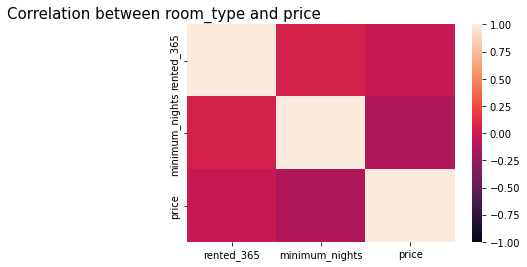

In [138]:
display(listing_nbgroup[['rented_365','minimum_nights','price']].corr())
import seaborn as sns
listing_corr1 = sns.heatmap(listing_nbgroup[['rented_365','minimum_nights','price']].corr(), vmax=1, vmin=-1).set_title('Correlation between room_type and price', fontdict={'fontsize': 15, 'horizontalalignment': 'right'})
listing_corr1

Terlihat dari nilai koefisien korelasi yang mendekati 0, antara total_days_rented, minimum_nights, dan price tidak ada yang memiliki korelasi kuat. Ketiga variable tersebut berkorelasi sangat lemah terhadap satu sama lain.

Berikut merupakan visualisasi dari total_days_rented vs minimum_nights, dan total_days_rented vs price:

In [139]:
rented_365_vs_minimum_nights = px.scatter(data_frame=listing_nbgroup,x='rented_365', y='minimum_nights', color="room_type", trendline="ols", trendline_scope="overall", trendline_color_override="black", template="simple_white", width=750)
rented_365_vs_minimum_nights.update_layout(title="<b>Rented_365 vs Minimum Night</b>",title_font=dict(size=18, color="black"))
rented_365_vs_minimum_nights


Diketahui dari Visualisasi Total_days_rented vs Minimum_night tersebut memang trendline dari kedua variable cenderung membentuk garis lurus, yang berarti korelasi antara dua variable lemah. Sehingga **kecil sekali hubungan antara lama suatu kamar tersewa selama satu tahun di Singapura dengan lama minimal penyewaan**.

In [140]:
rented_365_vs_price = px.scatter(data_frame=listing_nbgroup,x='rented_365', y='price', color="room_type", trendline="ols", trendline_scope="overall", trendline_color_override="black", template="simple_white", width=750)
rented_365_vs_price.update_layout(title="<b>Rented_365 vs Price</b>",title_font=dict(size=18, color="black"))
rented_365_vs_price


Diketahui dari Visualisasi Total_days_rented vs Price tersebut memang trendline dari kedua variable cenderung membentuk garis lurus, yang berarti korelasi antara dua variable lemah. Sehingga **kecil sekali hubungan antara lama suatu kamar tersewa selama satu tahun di Singapura dengan harganya**.

Tetapi jika dibandingkan mana variable yang lebih berpengaruh pada lama suatu kamar tersewa dalam satu tahun, minimum_night lebih berpengaruh dibandingkan dengan harga. 

Minimum_night dan lama suatu kamar tersewa dalam satu tahun berhubungan korelasi positif, hal ini disebabkan karena tentu semakin lama minimum penyewaan kamar, maka lama kamar tersewa dalam satu tahun lebih banyak juga.

###***Review Trend***

####***Bagaimana trend review kamar Airbnb di Singapura tiap hari, bulan, dan tahunnya?***

In [141]:
listing_reviews_per_date = listing_reviews.groupby('date').agg(count=('date','count')).sort_values(by=['date']).reset_index()
listing_reviews_per_month = listing_reviews.groupby('month').agg(count=('month','count')).sort_values(by=['month']).reset_index()
listing_reviews_per_years = listing_reviews.groupby('year').agg(count=('year','count')).sort_values(by=['year']).reset_index()

In [142]:
rvw_by_date = px.line(listing_reviews_per_date, x='date', y='count',title='Review Trend per Day')
rvw_by_date

In [143]:
rvw_by_month = px.line(listing_reviews_per_month, x='month', y='count',title='Review Trend by Year', markers = True)
rvw_by_month

In [144]:
rvw_by_year = px.line(listing_reviews_per_years, x='year', y='count',title='Review Trend by Year', markers=True, width = 750)
rvw_by_year

Dapat dilihat bahwa banyak review kamar tiap tahunnya melonjak dari 2018 menuju 2019, kemudian turun drastis pada tahun 2020. Hal ini sejalan dengan grafik '*Development of the tourism sector in Singapore from 1995 to 2020*' yang dipublikasikan oleh www.worlddata.info, dimana banyak turis yang masuk pada tahun 2019 mengalami kenaikan jika dibandingkan dengan tahun 2018, dan terjadi penurunan drastis pada tahun 2020. Dengan banyak turis yang masuk ini tentu sangat berpengaruh dengan aktivitas review kamar pada Airbnb di Singapura.
<br>

<img src="https://cdn.worlddata.info/graphs/tourism/arrivals-singapur-930.png"><br/>

<i>img source: https://cdn.worlddata.info/graphs/tourism/arrivals-singapur-930.png<p><br>

Penurunan aktivitas review kamar berlanjut pada tahun 2021, dimana pada tahun 2021 aktivitas review kamar Airbnb di Singapura merupakan yang paling rendah selama 5 tahun terakhir. Tetapi terjadi kenaikan aktivitas review kamar Airbnb di Singapura pada tahun 2022.

Penurunan dan kenaikan ini mungkin disebabkan oleh adanya pandemi *covid-19* yang dimulai pada tahun 2020 yang menyebabkan terbatasnya aktivitas pariwisata di Singapura, yang tentu berakibat pada aktivitas review kamar Airbnb yang ada di Singapura. Dan pandemi covid-19 ini berangsur membaik pada awal tahun 2022, sehingga aktivitas review kamar Airbnb kembali naik.

####***Bagaimana aktivitas review pada tiap Neighbourhood Group?***

Selanjutnya, kita akan melihat bagaimana review kamar yang dilakukan pada tiap Neighbourhood Group pada 5 tahun terakhir  di Singapura

In [145]:
listing_reviews_by_neighbourhood_group2 = listing_reviews.groupby('neighbourhood_group').agg(count=('neighbourhood_group','count')).sort_values(by=['count'], ascending=False).reset_index()
display(listing_reviews_by_neighbourhood_group2)

,neighbourhood_group,count
0,Central Region,18497
1,East Region,2023
2,North-East Region,1028
3,West Region,656
4,North Region,278


In [146]:
fig_rvw_nbg = px.bar(listing_reviews_by_neighbourhood_group2, x='neighbourhood_group',y='count', color = 'neighbourhood_group', title='Reviews Trend by Neighbourhood Group')
fig_rvw_nbg.add_hline(y=listing_reviews_by_neighbourhood_group2['count'].mean())

Diketahui dari grafik diatas, hanya Central Region yang memiliki banyak review kamar Airbnb di atas rata-rata. Hal ini terjadi karena memang 81.5% kamar Airbnb yang disewakan di Singapura berada pada Central Region.

####***Bagaimana aktivitas review pada tiap tipe kamar?***

Selanjutnya, kita akan melihat bagaimana review kamar yang dilakukan pada tiap tipe kamar pada 5 tahun terakhir  di Singapura

In [147]:
listing_reviews_by_room_type2 = listing_reviews.groupby('room_type').agg(count=('room_type','count')).sort_values(by=['count'], ascending=False).reset_index()
display(listing_reviews_by_room_type2)

,room_type,count
0,Private room,12417
1,Entire home/apt,7637
2,Hotel room,1708
3,Shared room,720


In [148]:
rvw_roomtype = px.bar(listing_reviews_by_room_type2, x='room_type',y='count', color = 'room_type', title='Reviews Trend by Room Type')
rvw_roomtype.add_hline(y=listing_reviews_by_room_type2['count'].mean())

Diketahui bahwa tipe kamar yang memiliki banyak review di atas rata-rata adalah Private room, dan entire home/apt, sehingga dapat diketahui bahwa mungkin dua tipe kamar tersebut adalah tipe kamar yang paling banyak disewa oleh pengguna sehingga memiliki banyak review di atas rata-rata.

In [149]:
rvw_by_room_type_tab = listing_reviews.groupby(['year','room_type']).agg(count=('year','count')).sort_values(by=['year']).reset_index()
rvw_by_room_type = px.line(rvw_by_room_type_tab, x='year', y='count', color = 'room_type' ,title='<b>Review Trend by Year', markers=True, width = 750)
rvw_by_room_type

Pada 5 tahun terakhir, Kamar tipe Private room selalu mendapatkan banyak review terbanyak dibandingkan dengan tipe kamar lain.

####***Bagaimana Aktivitas review pada Neighbourhood di Singapura?***

In [150]:
rvw_by_neighbourhood = listing_reviews.groupby(['neighbourhood_group','neighbourhood']).agg(count=('neighbourhood','count')).sort_values(by=['count'], ascending=False).reset_index().head(10)
display(rvw_by_neighbourhood)

,neighbourhood_group,neighbourhood,count
0,Central Region,Kallang,2968
1,Central Region,Downtown Core,2756
2,Central Region,Rochor,2707
3,Central Region,Outram,2599
4,Central Region,Geylang,1722
5,Central Region,Bukit Merah,1270
6,East Region,Bedok,1094
7,Central Region,River Valley,960
8,East Region,Tampines,746
9,Central Region,Singapore River,685


In [151]:
rvw_by_neighbourhood_plot = px.bar(rvw_by_neighbourhood.sort_values('count', ascending = True), x = 'count', y = 'neighbourhood', color = 'neighbourhood_group', orientation = 'h', width = 750, color_discrete_sequence=['#ffcaaf','#cc97c1'] )
rvw_by_neighbourhood_plot.update_layout(title="<b>Top 10 Neighbourhood with the most reviews</b>", title_font=dict(size=16))
rvw_by_neighbourhood_plot

Diketahui bahwa neighbourhood yang memiliki review penginapan terbanyak ada di Kallang.

####***Kamar mana yang memiliki review paling banyak?***

Berikut merupakan tabel dari 10 daftar kamar di Airbnb Singapura yang memiliki review paling banyak.

In [152]:
listing_reviews.groupby(['id', 'name', 'room_type']).agg(count=('id','count')).sort_values(by=['count'], ascending=False).reset_index().head(10)

,id,name,room_type,count
0,43337094,"Double Room, DAYUSE, 5 hours: 4PM-9PM",Private room,279
1,47945468,Single cabin shared bathroom in Tanjong Pagar MRT,Private room,255
2,4541183,Boat Quay Studio Premium River View (South bri...,Entire home/apt,236
3,1024986,Super Host Apartment,Entire home/apt,218
4,12484261,"City room 5mins to Haji, near Suntec/MBS/Merlion",Private room,207
5,21415749,Luxury Capsule (Single - Mixed) [Kampong Glam],Hotel room,206
6,12162272,"Great location. A spacious, well equipped home.",Entire home/apt,184
7,24659042,Cosy Studio Apartment 2 at Heritage Tiong Bahru,Entire home/apt,181
8,42417293,"Double Room, SHORT OVERNIGHT, 8 hours: 11PM-7AM",Private room,179
9,16891958,"Apt Room 5mins to Haji, near MBS/Suntec/Sportshub",Private room,169


####***Korelasi Variable dengan banyak review***

In [153]:
listing_by_room = listing_reviews.groupby(['id','minimum_nights','name','neighbourhood','neighbourhood_group','price','rented_365','room_type']).agg(review_num=('date','count')).sort_values(by=['review_num'], ascending=False).reset_index()

In [154]:
import plotly.graph_objects as go
import numpy as np

listing_corr2 = go.Figure()
listing_corr2.add_trace(
    go.Heatmap(
        x = listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().columns,
        y = listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().index,
        z = np.array(listing_by_room[['price','minimum_nights','rented_365','review_num']].corr()),
        text=listing_by_room[['price','minimum_nights','rented_365','review_num']].corr().values,
        texttemplate='%{text:.4f}',
        colorscale=px.colors.sequential.Sunset
    )
)
listing_corr2.update_layout(width = 750)
listing_corr2.show()

Terlihat dari nilai koefisien korelasi yang mendekati 0, antara minimal lama menyewa, harga, lama suatu kamar tersewa dalam satu tahun, dan banyak review tidak ada yang memiliki korelasi kuat. Ketiga variable tersebut berkorelasi sangat lemah terhadap satu sama lain. Tetapi diantara korelasi variable-variable tersebut, korelasi antara minimal lama menyewa suatu kamar, dan harga memiliki korelasi yang paling tinggi dengan nilai koefisien korelasi sebesar 0.263.  

Berikut merupakan visualisasi dari data minimal lama menyewa suatu kamar dengan harganya:

In [155]:
review_num_vs_price = px.scatter(data_frame=listing_by_room,x='review_num', y='price', color = 'room_type', trendline="ols", trendline_scope="overall", trendline_color_override="black", template="simple_white", width=750)
review_num_vs_price.update_layout(title="<b>Review_num vs Price</b>",title_font=dict(size=18, color="black"))
review_num_vs_price

Terihat bahwa semakin lama minimal sewa suatu kamar, maka akan semakin rendah harga penyewaan per malamnya. Kemungkinan pihak pemilik Kamar di Airbnb menawarkan paket semakin lama menginap maka harga yang ditawarkan semakin murah untuk menarik customer. 

##***Web Report Building***

In [156]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
from jupyter_dash import JupyterDash 
from dash import html 
from dash import dcc

from dash import Input
from dash import Output

###Web2

In [158]:
app = JupyterDash(__name__)

# Design Layout
app.layout = html.Div([
    html.Div(html.H1("Singapore Airbnb Analysis",style={'textAlign':'center', 'font-family':'Calibri','font-size':40,'color':'#1A0000'}))
    ,html.Img(src = 'https://www.johnlkong.com/wp-content/uploads/2018/01/hilton_hotel_header-720x245.jpg',style={'height': '40%','width': '100%','textAlign' : 'center'})
    ,html.P("author: Lutfia Husna Khoirunnisa (https://www.linkedin.com/in/lutfiahusnakhoirunnisa)",style={'textAlign':'center', 'font-family':'Calibri','font-style': 'italic','font-size':20,'color':'#1A0000','font-weight':'lighter'})
    ,html.Br()
    ,html.Div(
        children = [html.H3('Bisnis Penginapan di Airbnb', style = {'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div(dcc.Markdown('''
            Pada satu tahun terakhir ini, kasus covid-19 di dunia sudah cukup menurun. 
            Banyak aktivitas yang sebelumnya tidak dapat dilakukan karena adanya pandemi covid-19 kini telah mulai berjalan kembali, salah satu aktivitas 
            yang kini sudah mulai banyak dilakukan adalah traveling. Dengan mulai bergeraknya kembali industri pariwisata, para pebisnis mulai kembali melirik 
            sektor tersebut untuk mengambil peluang sebesar-besarnya. Salah satu bisnis yang sedang naik saat ini adalah bisnis penginapan.

            Dengan kemajuan teknologi, kini pebisnis dipermudah dalam memasarkan penginapan dengan adanya suatu online market platform yaitu Airbnb. 
            Dengan adanya Airbnb ini tentu sangat membantu pemilik penginapan untuk berhubungan dengan customernya, dan membantu dalam memasarkan penginapannya.
            Dengan mulai naiknya bisnis penginapan, tentu persaingan akan semakin ketat dan pebisnis perlu untuk melakukan riset terlebih dahulu sebelum melakukan investasi 
            agar dapat menetapkan strategi yang tepat untuk memperoleh keuntungan yang maksimal dan dapat bersaing dengan kompetitornya. Riset ini dapat dilakukan 
            dengan melihat bagaimana aktivitas bisnis pada beberapa tahun terakhir, untuk melihat bagaimana gambaran, dan mengetahui trendnya.

            Pada artikel ini akan diberikan gambaran bagaimana aktivitas bisnis penginapan di Airbnb Singapura selama 5 tahun terakhir. 
        '''),style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'})
        ]
    )
    ,html.Div(children = [
        html.H3('Bagaimana Aktivitas Penyewaan penginapan di Airbnb Singapura?', style = {'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':23,'color':'#1A0000','font-weight':'light'})
        ,html.P('Aktivitas penyewaan penginapan di Airbnb Singapura jika dilihat dari aktivitas review di Airbnb', style = {'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':20,'color':'#1A0000','font-weight':'light'})
        ,html.P('''
            Tentu kita memiliki keterbatasan untuk mendapatkan data aktivitas penyewaan pada tiap penginapan di Airbnb, karena tentu data tersebut bersifat rahasia
            milik tiap-tiap penyedia penginapan. Tetapi kita dapat melihat bagaimana gambaran umum dari aktivitas penyewaan dengan melihat aktivitas review yang
            dilakukan oleh customer melalui platform Airbnb. Dengan melihat bagaimana gambaran dari aktivitas review penginapan di Airbnb, kita dapat melihat 
            bagaimana trend penyewaan dari tiap penginapan pada tiap waktunya.
        ''', style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'})
        ,dcc.Tabs([
            dcc.Tab(
                label = 'Per Hari', children = [
                    dcc.Graph(id = 'rvw_by_date', figure = rvw_by_date,config={"displayModeBar": False})
                ]
            ),
            dcc.Tab(
                label = 'Per Bulan', children = [
                    dcc.Graph(id = 'rvw_by_month',figure = rvw_by_month, config = {"displayModeBar": False})
                ]
            ),
            dcc.Tab(
                label = 'Per Tahun', children = [
                    html.Div(dcc.Graph(id = 'rvw_by_year',figure = rvw_by_year,config = {"displayModeBar": False})
                    , style = {'width' : '60%', 'margin-left':300})
                ]
            )
        ])
        ,html.Div(dcc.Markdown('''
            Dapat dilihat bahwa banyak review penginapan tiap tahunnya, banyak review melonjak dari 2018 menuju 2019, kemudian turun drastis pada tahun 2020. 
            Hal ini sejalan dengan grafik 'Development of the tourism sector in Singapore from 1995 to 2020' yang dipublikasikan oleh www.worlddata.info, dimana 
            banyak turis yang masuk pada tahun 2019 mengalami kenaikan jika dibandingkan dengan tahun 2018, dan terjadi penurunan drastis pada tahun 2020. 
            Dengan banyak turis yang masuk ini tentu sangat berpengaruh dengan aktivitas review penginapan pada Airbnb di Singapura.
        ''', style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}))
        ,html.Img(src = 'https://cdn.worlddata.info/graphs/tourism/arrivals-singapur-930.png', style = {'width':'80%','display':'inline-block', 'margin-left':100})
        ,html.Div(dcc.Markdown('img source: https://cdn.worlddata.info/graphs/tourism/arrivals-singapur-930.png'), style = {'textAlign':'center', 'font-family':'Calibri','font-style': 'italic','font-size':20,'color':'#1A0000','font-weight':'light'})
        ,html.Div(dcc.Markdown('''
            Penurunan aktivitas review kamar berlanjut pada tahun 2021, dimana pada tahun 2021 aktivitas review kamar Airbnb di 
            Singapura merupakan yang paling rendah selama 5 tahun terakhir. Tetapi terjadi kenaikan aktivitas review kamar Airbnb di Singapura pada tahun 2022.
            Penurunan dan kenaikan ini mungkin disebabkan oleh adanya pandemi covid-19 yang dimulai pada tahun 2020 dan berlangsung hingga awal tahun 2022
             yang menyebabkan terbatasnya aktivitas pariwisata di Singapura. Tentu hai ini berakibat pada aktivitas review penginapan Airbnb yang ada di Singapura. Dan pandemi covid-19 ini 
            kasus covid-19 berangsur menurun, sehingga aktivitas review kamar Airbnb kembali naik. 

            Jika dilihat dari banyak review penginapan per bulannya, pada bulan Desember hingga Januari tiap tahunnya pada 5 tahun terakhir cenderung lebih tinggi aktivitas reviewnya dibandingkan
            dengan bulan-bulan lain. Hal ini tentu menarik, karena trend ini cenderung berulang pada 5 tahun terakhir. 
        '''),style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'})
        ])
    ,html.Div([
        html.H3('Bagaimana Penyebaran Penginapan di Singapura?', style = {'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div(
            children = dcc.Graph(
                id = 'fig_map2', figure = listing_map, config={"displayModeBar": False}),
             style={'width': '60%', 'margin-left':'3%', 'display': 'inline-block'}
        )
        ,html.Div(children = dcc.Markdown('''
            Penginapan yang disediakan di Airbnb Singapura menyebar di seluruh wilayah Singapura, tetapi penginapan paling banyak berada pada Central Region. 
            Central Region sendiri merupakan pusat bisnis dan hiburan di Singapura, sehingga pembangunan penginapan di sini sangat menjanjikan
            untuk dijadikan tempat untuk berbisnis penyewaan penginapan di Singapura. Tetapi  tentu dengan banyaknya penginapan di Central Region, 
            tentu persaingan dengan kompetitor akan semakin ketat, maka perlu untuk merancang strategi yang baik untuk lebih unggul dari kompetitor. 
            
            Strategi yang baik sangat diperlukan untuk unggul dalam persaingan, contohnya seperti mengembangkan konsep penginapan yang unik 
            untuk menarik pengunjung, memperkuat marketing, dan fokus pada kualitas layanan serta kualitas kamar yang disewakan. Letak penginapan 
            yang strategis juga perlu dipertimbangkan, karena letak penginapan merupakan salah satu faktor
            yang paling berpengaruh pada aktivitas penyewaan.                  
            '''),
                style={'vertical-align':'top', 'margin-left':10, 'width': '35%', 'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000','font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}
            )
    ])
    ,html.Div([
        html.H3('Gambaran Umum pada Neighbourhood di Singapura', style = {'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div( dcc.Graph( 
                id = 'top5_nbhood_plot', figure = top_nbhood_plot, config={"displayModeBar": False}),
                style={'width': '47%', 'display': 'inline-block', 'margin-left':30})
                ,html.Div(dcc.Graph( 
                id = 'rvw_by_neighbourhood_plot', figure = rvw_by_neighbourhood_plot, config={"displayModeBar": False}),
                style={'width': '50%', 'display': 'inline-block'})
    ])
    ,html.Div(children = dcc.Markdown('''
            Diketahui neighbourhood yang menyediakan penginapan terbanyak di Airbnb Singapura adalah 
            Kallang yang berada di Central Region. Karena memiliki banyak penginapan, Kallang juga mendapatkan akumulasi review penginapan paling banyak di Airbnb Singapura.
            Kallang memiliki banyak daya tarik bagi wisatawan, seperti Sungai Kallang, dan tempat iconic lain seperti new National Stadium, 
            Kallang Wave Mall, dan Kallang menyediakan banyak fasilitas untuk melakukan aktivitas olahraga sehingga Kallang menjadi tempat yang memiliki daya tarik turis
            dan menjanjikan untuk dijadikan tempat berbisnis penyewaan penginapan melalui Airbnb.
            '''),
            style={'vertical-align':'top', 'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word','padding':7, 'margin-left':30, 'margin-right':30}
            ) 
    ,html.Div([
        html.H3("Bagaimana Gambaran Umum Mengenai Room Type di Airbnb Singapura?",style={'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,dcc.Tabs([
            dcc.Tab(
                label = 'Room type distribution', children = [
                    dcc.Graph(id = 'room_type_pie', figure = room_type_pie,config={"displayModeBar": False})
                ]
            ),
            dcc.Tab(
                label = 'Number of Reviews for Each Room Type', children = [
                    dcc.Graph(id = 'rvw_by_room_type',figure = rvw_by_room_type, config = {"displayModeBar": False})
                ]
            ),
            dcc.Tab(
                label = 'Price mean for Each Room Type', children = [
                    html.Div(dcc.Graph(id = 'price_by_roomtype_plot',figure = price_by_roomtype_plot,config = {"displayModeBar": False})
                    , style = {'width' : '60%', 'margin-left':300})
                ]
            )
        ])
        ,html.Div(children = dcc.Markdown('''
              Jenis kamar yang paling banyak di Airbnb Singapura adalah Private room dengan banyak kamar sebesar 47.4% dari total kamar.
              Hal ini sesuai dengan aktivitas review Airbnb Singapura yang pada 5 tahun terakhir, dimana diketahui bahwa kamar dengan tipe Private room 
              selalu mendapatkan banyak review tertinggi di antara tipe kamar lainnya. 
              Dengan rata-rata harga 168 SGD, per malam yaitu nomor 2 terendah dibandingkan dengan tipe kamar lainnya, tipe kamar private room ini disewa 
              banyak customer di Singapura, dilihat dari banyak review yang ada pada Airbnb.
              '''),
                style={'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}
            )
    ])
    ,html.H3("Singaporean Airbnb Price Distribution and Rental Trend",style={'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
    ,dcc.Tabs([
        dcc.Tab(
            label = 'Price Mapping', children = [
                html.Div(dcc.Graph(
                    id = 'price_map', figure = price_map, config={"displayModeBar": False}
                ), style = {'width' : '60%', 'margin-left':300})
            ]
        ),
        dcc.Tab(
            label = 'Length of a Room is Rented in a Year Mapping', children = [
                html.Div(dcc.Graph(
                    id = 'rented_365_map', figure = rented_365_map, config={"displayModeBar": False}
                ), style = {'width' : '60%', 'margin-left':300})
            ]
        )
    ])
    ,html.Div(children = dcc.Markdown('''
        Dari mapping plot harga tersebut, diketahui bahwa mayoritas dari penyewa penginapan di Airbnb memberikan harga dibawah 2000. 
        Distribusi harga ini menyebar, dan tidak bergantung pada dimana letak dari penginapan tersebut. Sehingga dapat dikatakan bahwa 
        posisi penginapan tidak berkorelasi dengan harga yang diberikan oleh penyewa. Pemberian harga ini kemungkinan lebih bergantung pada
        fasilitas apa saja yang disediakan oleh penginapan dan juga bergantung pada kelas dari penginapan.
            
        Begitu juga pada lama suatu kamar penginapan tersewa dalam satu tahun, pada mapping plot tersebut diketahui bahwa distribusinya menyebar dan tidak bergantung pada 
        letak penginapan. Dapat dilihat bahwa di daerah North-east Region memiliki sedikit penginapan yang disewakan, tetapi mayoritas memiliki lama penginapan tersewa 
        yang cenderung tinggi. Pada Central Region, terlihat sangat banyak penginapan yang disewakan tetapi memiliki lama penginapan tersewa dalam satu tahun yang 
        mayoritas relatif rendah. Hal ini mungkin terjadi karena banyaknya pilihan penginapan yang tersedia di kawasan Central Region, menjadikan turis lebih sering 
        berpindah pindah penginapan sehingga menyebabkan lama penginapan tersewa dalam satu tahun cenderung rendah.
        '''), 
        style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'})
    ,html.Div([
        html.H3('Apa yang Memiliki Pengaruh Pada Banyak Review?',style={'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div(dcc.Graph(id = 'listing_corr2', figure = listing_corr2), style = {'width':'60%', 'margin-left':300})
        ,html.Div(dcc.Markdown('''
            Terlihat dari nilai koefisien korelasi yang mendekati 0, antara minimal lama menyewa, harga, lama suatu kamar tersewa dalam satu tahun, 
            dan banyak review tidak ada yang memiliki korelasi kuat. Keempat variable tersebut berkorelasi sangat lemah terhadap satu sama lain. 
            Tetapi diantara korelasi variable-variable tersebut, korelasi antara minimal lama menyewa suatu kamar, dan harga memiliki korelasi yang 
            paling tinggi dengan nilai koefisien korelasi sebesar 0.263.

            Jika dilihat dari koefisien korelasi, variable yang paling memiliki pengaruh pada banyak review adalah price. 
            Berikut merupakan visualisasi dari data banyak review dari suatu kamar dengan harganya:
        '''), style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'})
        ,html.Div(
            dcc.Graph(id = 'review_num_vs_price', figure = review_num_vs_price), style = {'width':'60%', 'margin-left':300}
        )
        ,html.Div(
            dcc.Markdown('''
            Terihat bahwa antara banyak review dan harga memiliki korelasi negatif, artinya semakin banyak review yang diperoleh 
            semakin rendah harga penyewaan per malamnya. Tetapi karena koefisien korelasi sangat kecil dan mendekati 0,
            kita tetap tidak dapat memutuskan jika harga memiliki pengaruh terhadap banyak review.
            '''), style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}
        )
    ])
    ,html.Div([
        html.H3('Business Recomendation',style={'margin':0,'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div(
            dcc.Markdown('''
            Diketahui bahwa  harga, minimal lama sewa, lama suatu kamar tersewa dalam satu tahun, dan banyaknya review yang diperoleh dalam 5 tahun terakhir 
            memiliki hubungan korelasi yang sangat rendah sehingga tidak dapat menyimpulkan bahwa variabel variable tersebut berhubungan. Sehingga, pebisnis 
            lebih baik melakukan riset lanjutan dengan melihat fasilitas atau keunikan apa yang belum disediakan oleh kompetitor sehingga dapat lebih unggul 
            dan menambah daya tarik pelanggan.
            
            Untuk menentukan harga yang tepat untuk ditawarkan, pebisnis dapat melakukan pemodelan prediksi harga secara statistik, contohnya dengan model 
            logistic regression, atau model regresi lain. Untuk mendapatkan prediksi yang lebih baik dan akurat, pebisnis dapat mengumpulkan kembali lebih 
            banyak data, atau menambah variabel - variabel yang mungkin memiliki hubungan dengan harga, seperti fasilitas yang disediakan, berapa kamar yang 
            ditawarkan, dan variable lain yang kiranya memiliki pengaruh terhadap harga.

            '''), style = {'textAlign':'Left', 'margin-left':30, 'margin-right':30,'display': 'inline-block', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}
        )
    ,html.Div([
        html.H3('References',style={'margin':0,'textAlign':'Left', 'margin-left':30, 'font-family':'Calibri','font-style': 'italic','font-size':25,'color':'#1A0000','font-weight':'light'})
        ,html.Div(
            dcc.Markdown('''
            * https://www.airbnb.com/
            * https://www.visitsingapore.com/see-do-singapore/
            * https://www.worlddata.info/asia/singapore/tourism.php
            '''), style = {'margin-top':0, 'margin-left':30, 'display': 'inline', 'font-family':'Calibri','font-style': 'italic','font-size':17,'color':'#1A0000',
                       'font-weight':'light','textAlign': 'justify','text-justify': 'inter-word'}
        )
      ])
    ])
])

# Run Application
if __name__ == '__main__':
  app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>